# Geração de novas imagens do Cifar10

## Etapa 1: Importação das bibliotecas

In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F

torch.manual_seed(42)

## Etapa 2: Base de dados

In [2]:
transform = transforms.ToTensor()

train = datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=256, shuffle=True)

100.0%
100.0%
100.0%
100.0%


## Etapa 3: Construção do gerador

In [3]:
class generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense5 = nn.Linear(128, 784)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense5(X))
    X = X.view(X.shape[0], 28, 28)
    return X


## Etapa 4: Construção do discriminador

In [4]:
class discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 784)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)

    return X

## Etapa 5: Criação dos objetos

In [5]:
G = generator()
D = discriminator()

In [6]:
G_optimizer = optim.Adam(G.parameters(), lr=0.002)
D_optimizer = optim.Adam(D.parameters(), lr=0.002)

In [7]:
criterion = nn.BCEWithLogitsLoss()

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [9]:
G.to(device)
D.to(device)

discriminator(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

Época 001 finalizada: Loss Discriminador 0.802357 - Loss Gerador 3.707054


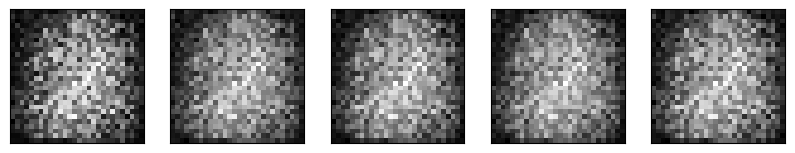

Época 002 finalizada: Loss Discriminador 0.721806 - Loss Gerador 4.744970


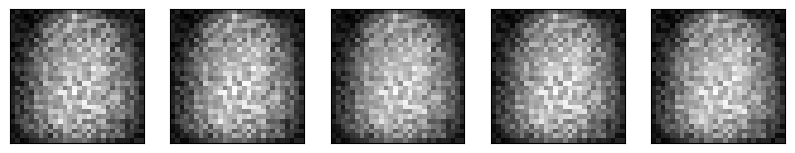

Época 003 finalizada: Loss Discriminador 0.614923 - Loss Gerador 4.594486


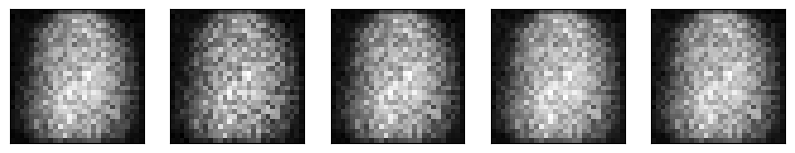

Época 004 finalizada: Loss Discriminador 0.595195 - Loss Gerador 4.206294


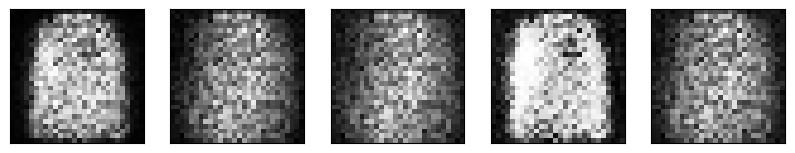

Época 005 finalizada: Loss Discriminador 0.635283 - Loss Gerador 4.140245


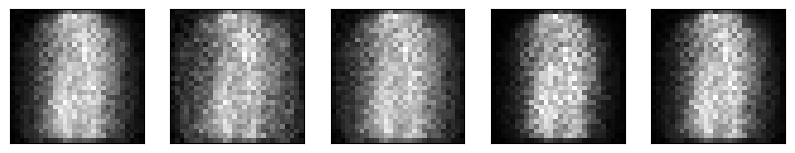

Época 006 finalizada: Loss Discriminador 0.754963 - Loss Gerador 3.622453


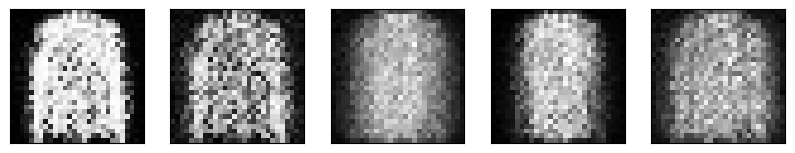

Época 007 finalizada: Loss Discriminador 0.768137 - Loss Gerador 3.451114


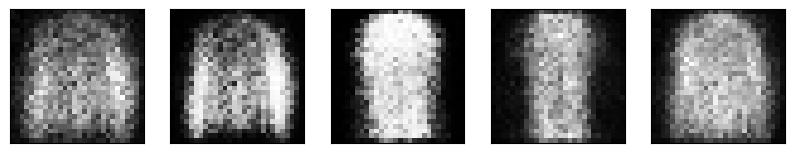

Época 008 finalizada: Loss Discriminador 0.805801 - Loss Gerador 3.366555


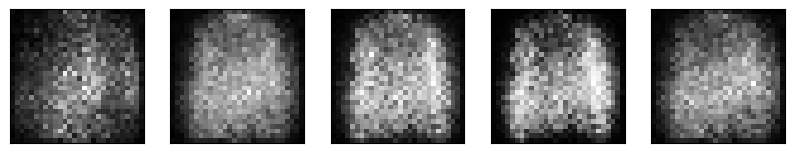

Época 009 finalizada: Loss Discriminador 0.789463 - Loss Gerador 3.360223


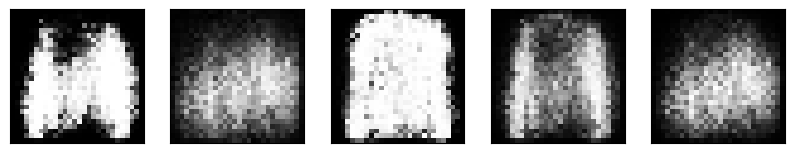

Época 010 finalizada: Loss Discriminador 0.848836 - Loss Gerador 2.899771


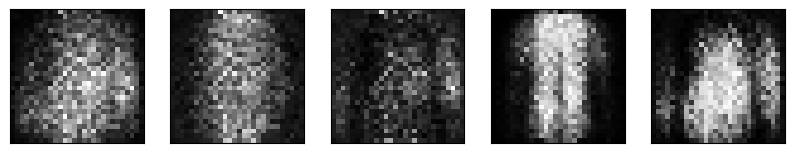

Época 011 finalizada: Loss Discriminador 0.873179 - Loss Gerador 2.673975


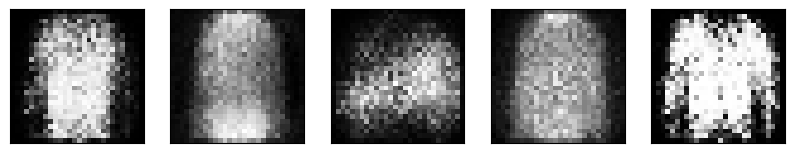

Época 012 finalizada: Loss Discriminador 0.983887 - Loss Gerador 2.245278


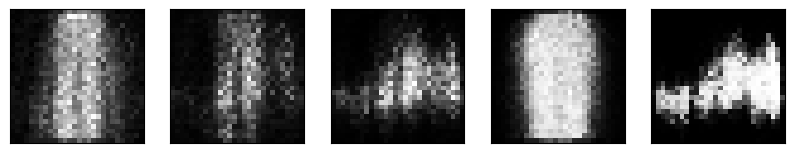

Época 013 finalizada: Loss Discriminador 0.998211 - Loss Gerador 1.945916


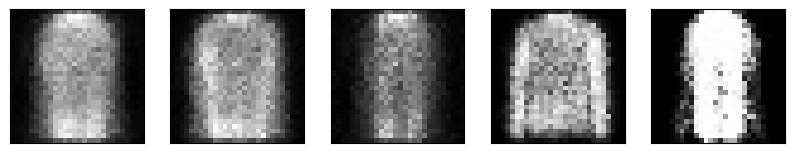

Época 014 finalizada: Loss Discriminador 0.984349 - Loss Gerador 2.111615


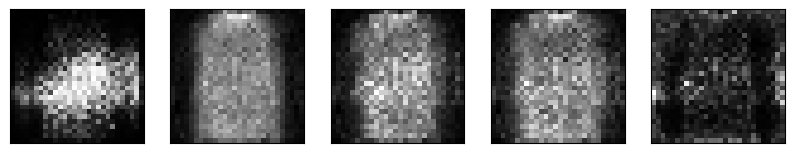

Época 015 finalizada: Loss Discriminador 0.998829 - Loss Gerador 2.030636


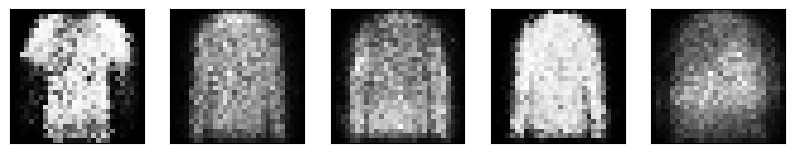

Época 016 finalizada: Loss Discriminador 1.077907 - Loss Gerador 1.817355


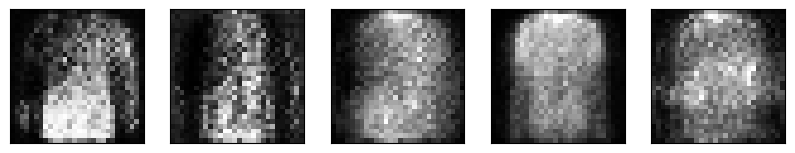

Época 017 finalizada: Loss Discriminador 1.042156 - Loss Gerador 1.991932


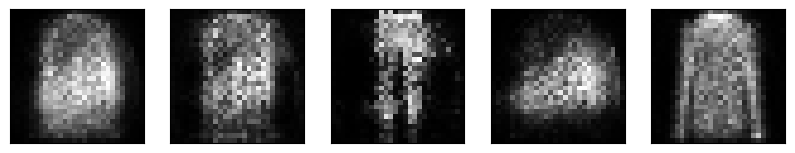

Época 018 finalizada: Loss Discriminador 1.072136 - Loss Gerador 1.925098


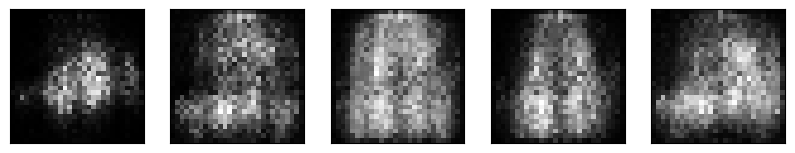

Época 019 finalizada: Loss Discriminador 1.050115 - Loss Gerador 1.877247


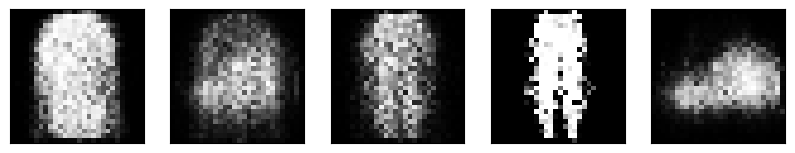

Época 020 finalizada: Loss Discriminador 1.067388 - Loss Gerador 1.829042


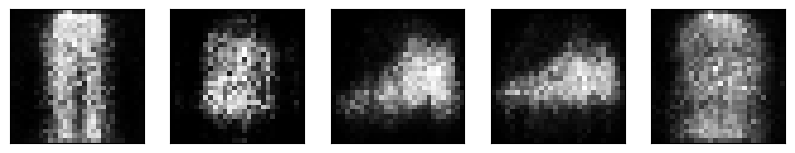

Época 021 finalizada: Loss Discriminador 1.078859 - Loss Gerador 1.755501


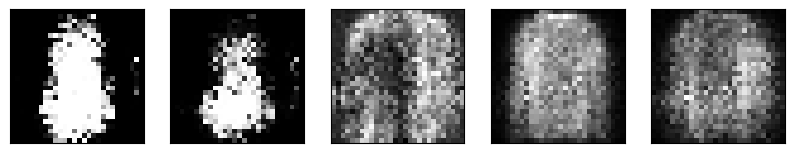

Época 022 finalizada: Loss Discriminador 1.145685 - Loss Gerador 1.537877


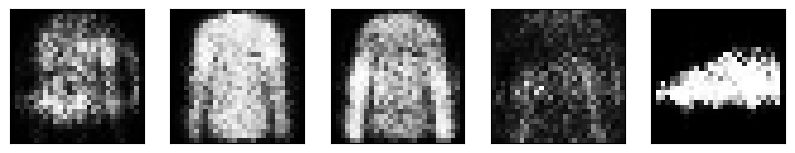

Época 023 finalizada: Loss Discriminador 1.123441 - Loss Gerador 1.662176


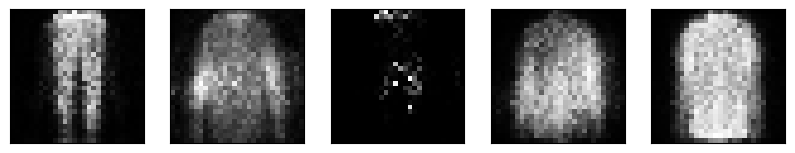

Época 024 finalizada: Loss Discriminador 1.131998 - Loss Gerador 1.605753


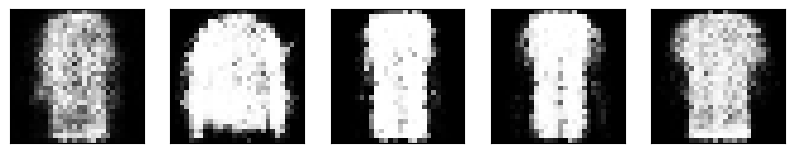

Época 025 finalizada: Loss Discriminador 1.139300 - Loss Gerador 1.536877


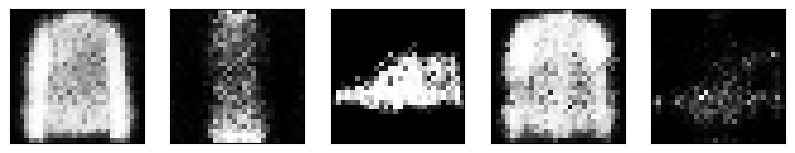

Época 026 finalizada: Loss Discriminador 1.152667 - Loss Gerador 1.492021


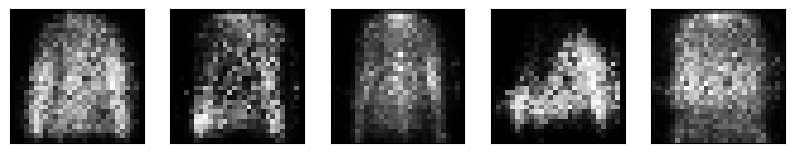

Época 027 finalizada: Loss Discriminador 1.155905 - Loss Gerador 1.468976


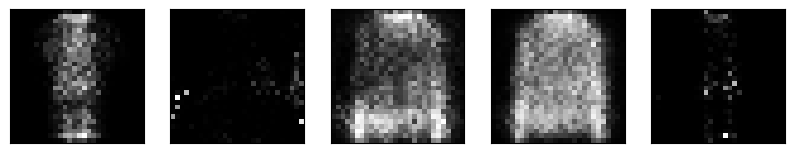

Época 028 finalizada: Loss Discriminador 1.179137 - Loss Gerador 1.463206


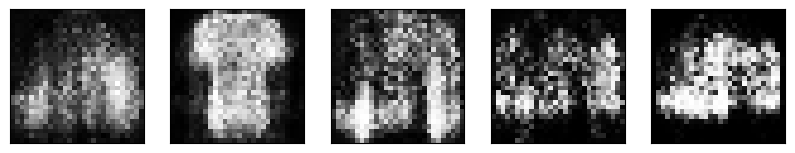

Época 029 finalizada: Loss Discriminador 1.218951 - Loss Gerador 1.314487


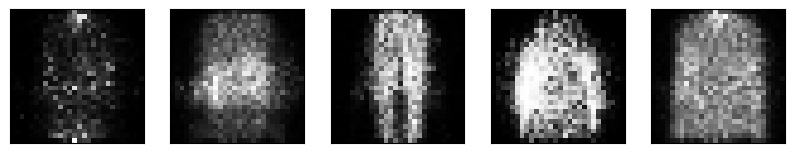

Época 030 finalizada: Loss Discriminador 1.192505 - Loss Gerador 1.398866


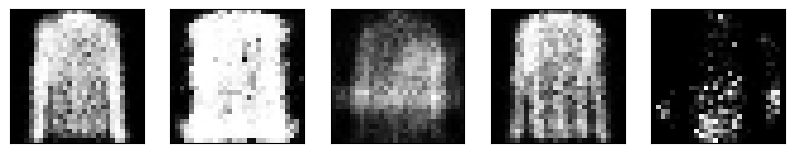

Época 031 finalizada: Loss Discriminador 1.211437 - Loss Gerador 1.328739


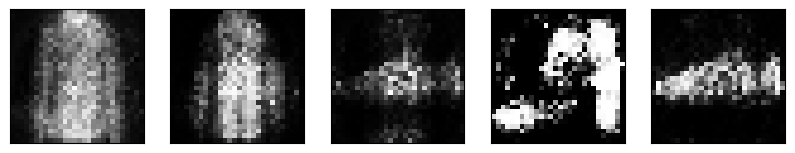

Época 032 finalizada: Loss Discriminador 1.215231 - Loss Gerador 1.391119


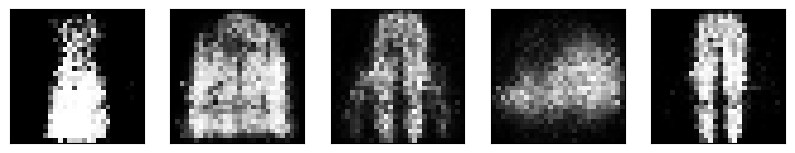

Época 033 finalizada: Loss Discriminador 1.200245 - Loss Gerador 1.375898


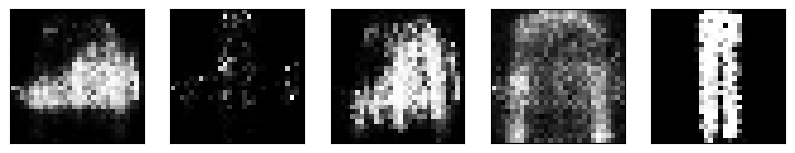

Época 034 finalizada: Loss Discriminador 1.209001 - Loss Gerador 1.361532


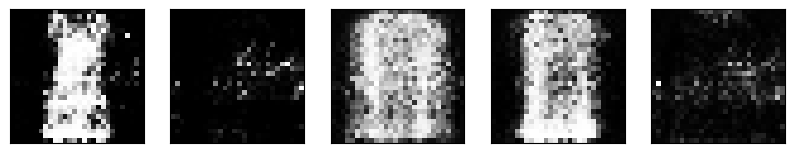

Época 035 finalizada: Loss Discriminador 1.198811 - Loss Gerador 1.361717


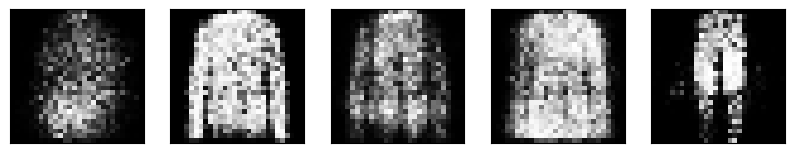

Época 036 finalizada: Loss Discriminador 1.204151 - Loss Gerador 1.393234


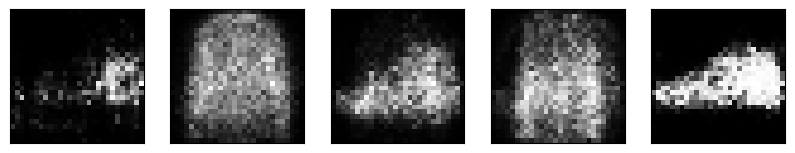

Época 037 finalizada: Loss Discriminador 1.207312 - Loss Gerador 1.453103


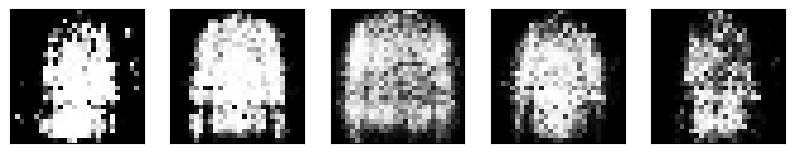

Época 038 finalizada: Loss Discriminador 1.224461 - Loss Gerador 1.390197


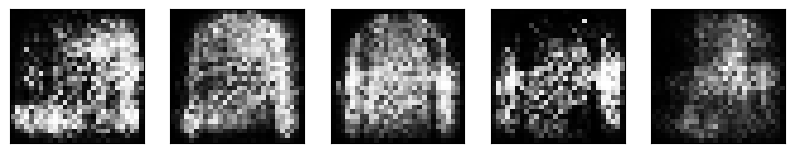

Época 039 finalizada: Loss Discriminador 1.202449 - Loss Gerador 1.307172


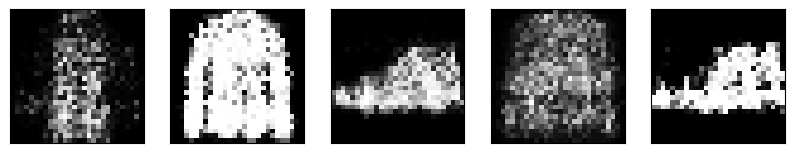

Época 040 finalizada: Loss Discriminador 1.212197 - Loss Gerador 1.469360


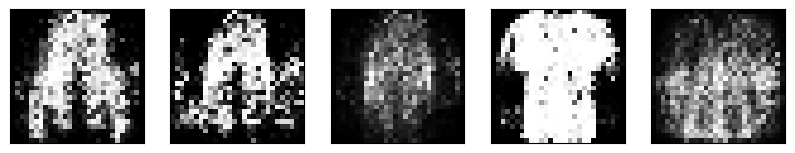

Época 041 finalizada: Loss Discriminador 1.206071 - Loss Gerador 1.424532


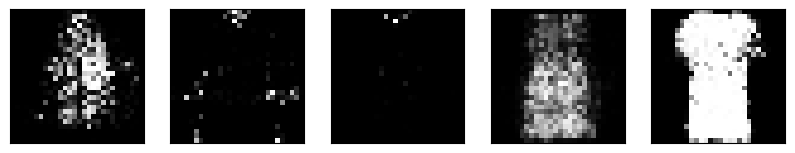

Época 042 finalizada: Loss Discriminador 1.213399 - Loss Gerador 1.395536


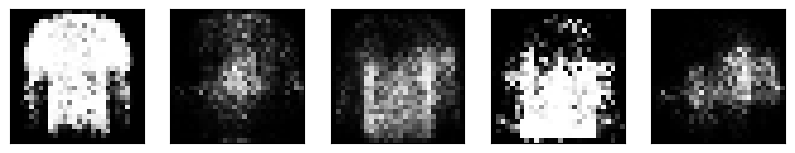

Época 043 finalizada: Loss Discriminador 1.205884 - Loss Gerador 1.422080


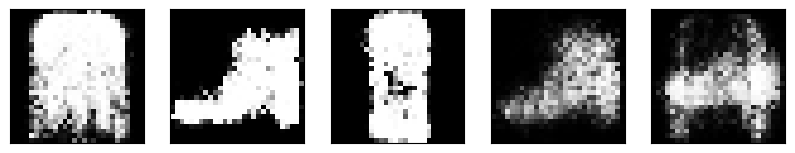

Época 044 finalizada: Loss Discriminador 1.205571 - Loss Gerador 1.324561


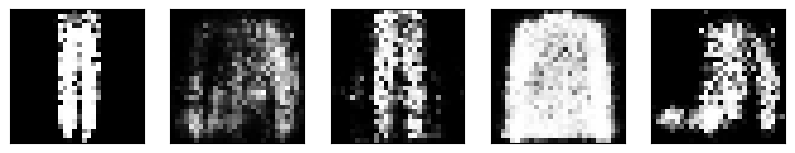

Época 045 finalizada: Loss Discriminador 1.213848 - Loss Gerador 1.340306


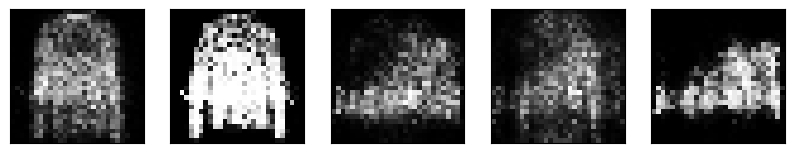

Época 046 finalizada: Loss Discriminador 1.232866 - Loss Gerador 1.271267


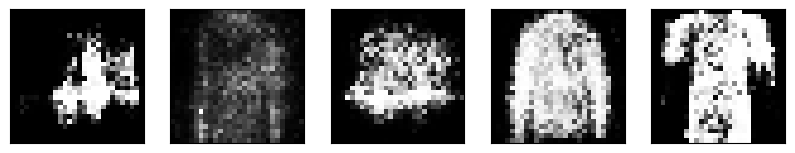

Época 047 finalizada: Loss Discriminador 1.210074 - Loss Gerador 1.338335


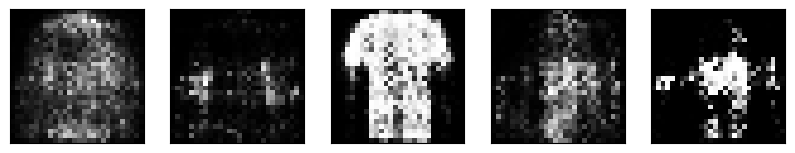

Época 048 finalizada: Loss Discriminador 1.228770 - Loss Gerador 1.287205


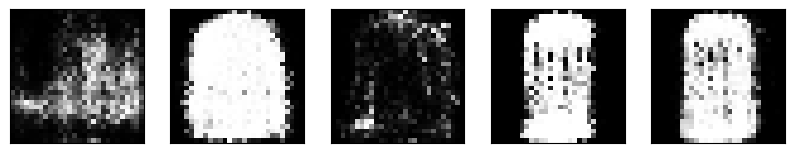

Época 049 finalizada: Loss Discriminador 1.187807 - Loss Gerador 1.397432


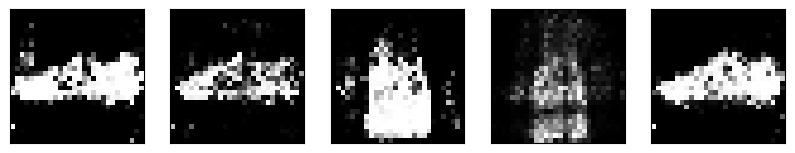

Época 050 finalizada: Loss Discriminador 1.214805 - Loss Gerador 1.421993


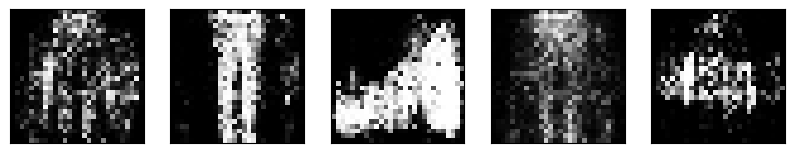

Época 051 finalizada: Loss Discriminador 1.214763 - Loss Gerador 1.329258


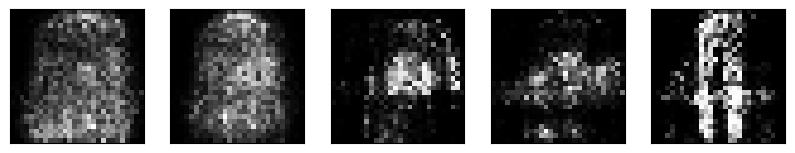

Época 052 finalizada: Loss Discriminador 1.228682 - Loss Gerador 1.351433


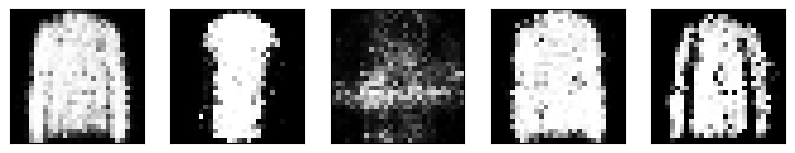

Época 053 finalizada: Loss Discriminador 1.233955 - Loss Gerador 1.327176


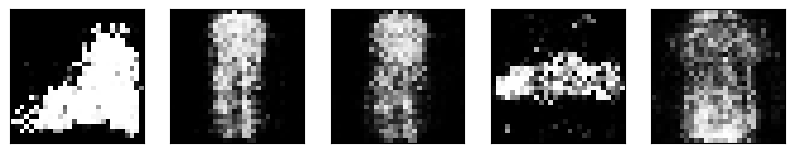

Época 054 finalizada: Loss Discriminador 1.211284 - Loss Gerador 1.399131


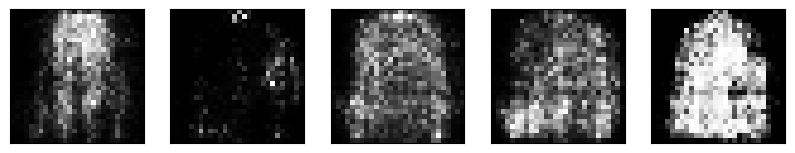

Época 055 finalizada: Loss Discriminador 1.211148 - Loss Gerador 1.281375


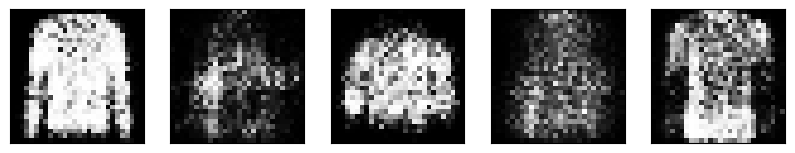

Época 056 finalizada: Loss Discriminador 1.234418 - Loss Gerador 1.312671


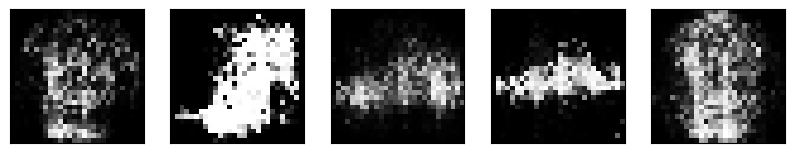

Época 057 finalizada: Loss Discriminador 1.224432 - Loss Gerador 1.329047


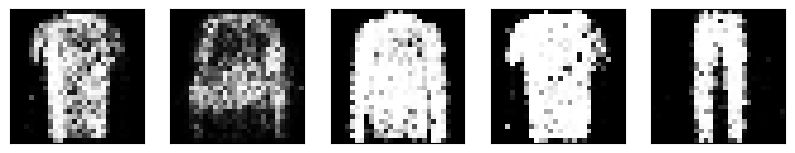

Época 058 finalizada: Loss Discriminador 1.231167 - Loss Gerador 1.300319


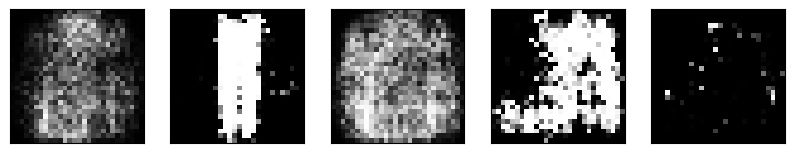

Época 059 finalizada: Loss Discriminador 1.223775 - Loss Gerador 1.299207


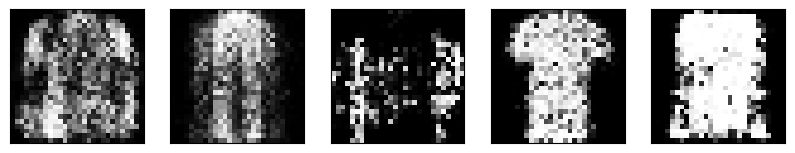

Época 060 finalizada: Loss Discriminador 1.237306 - Loss Gerador 1.306138


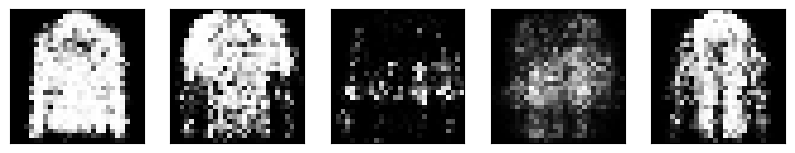

Época 061 finalizada: Loss Discriminador 1.205033 - Loss Gerador 1.426738


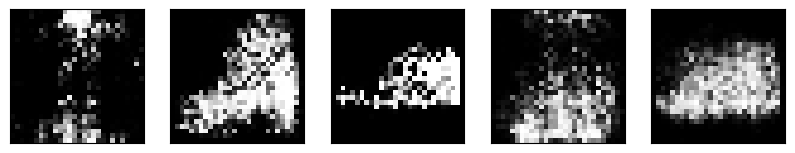

Época 062 finalizada: Loss Discriminador 1.202472 - Loss Gerador 1.378877


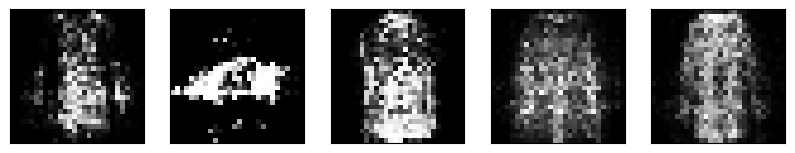

Época 063 finalizada: Loss Discriminador 1.215627 - Loss Gerador 1.436580


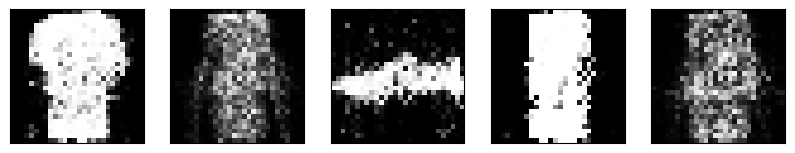

Época 064 finalizada: Loss Discriminador 1.218126 - Loss Gerador 1.360316


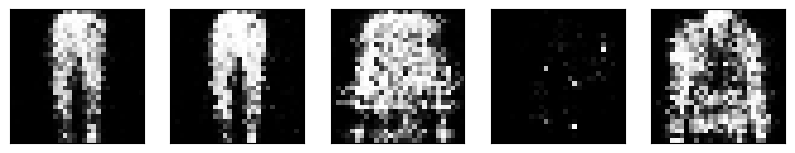

Época 065 finalizada: Loss Discriminador 1.191210 - Loss Gerador 1.419093


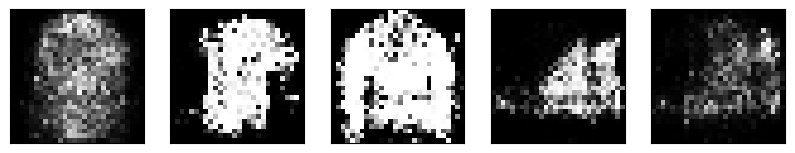

Época 066 finalizada: Loss Discriminador 1.184942 - Loss Gerador 1.486671


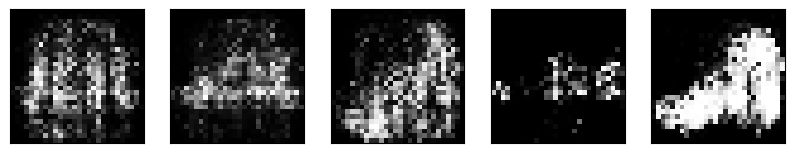

Época 067 finalizada: Loss Discriminador 1.206458 - Loss Gerador 1.420330


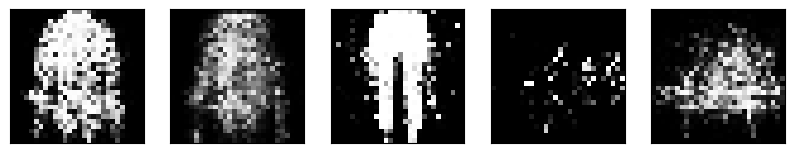

Época 068 finalizada: Loss Discriminador 1.220997 - Loss Gerador 1.359436


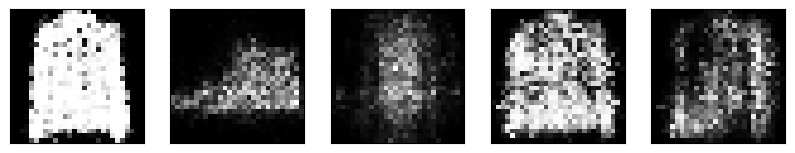

Época 069 finalizada: Loss Discriminador 1.208133 - Loss Gerador 1.466103


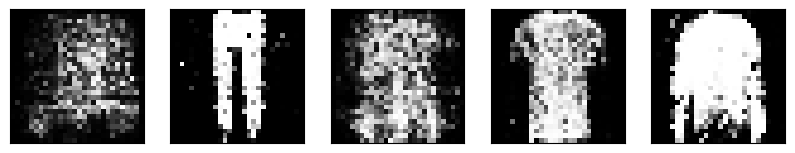

Época 070 finalizada: Loss Discriminador 1.213801 - Loss Gerador 1.366647


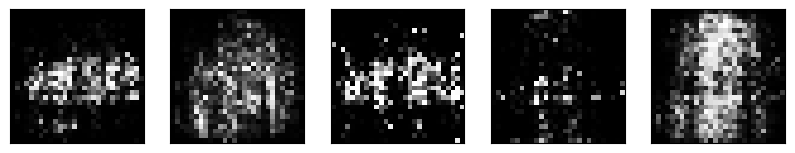

Época 071 finalizada: Loss Discriminador 1.218168 - Loss Gerador 1.430402


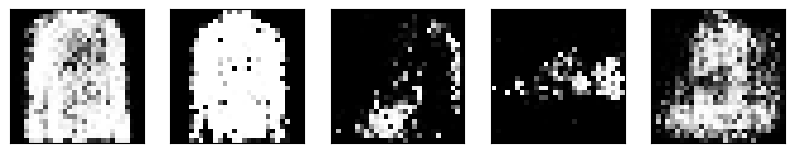

Época 072 finalizada: Loss Discriminador 1.210222 - Loss Gerador 1.473532


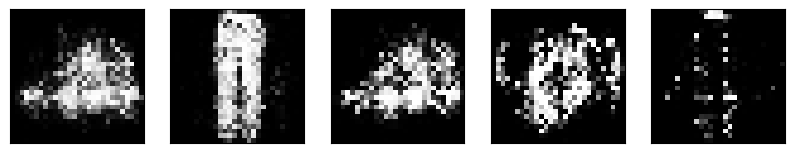

Época 073 finalizada: Loss Discriminador 1.213861 - Loss Gerador 1.450891


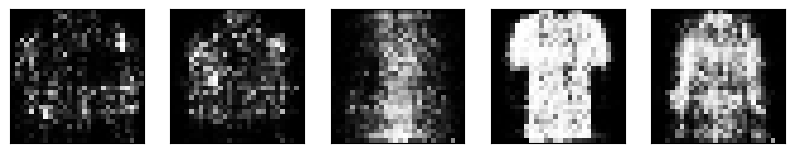

Época 074 finalizada: Loss Discriminador 1.209832 - Loss Gerador 1.410418


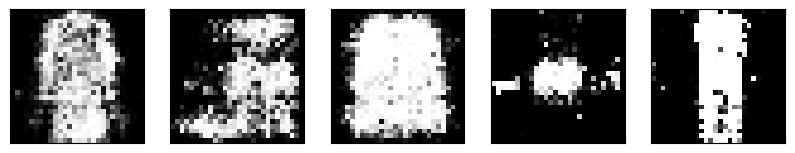

Época 075 finalizada: Loss Discriminador 1.202520 - Loss Gerador 1.485963


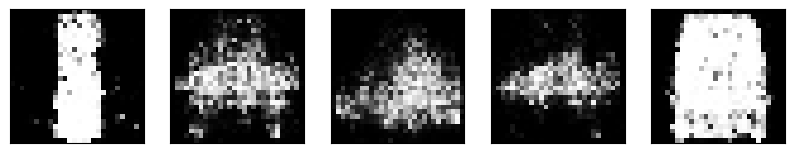

Época 076 finalizada: Loss Discriminador 1.182437 - Loss Gerador 1.512183


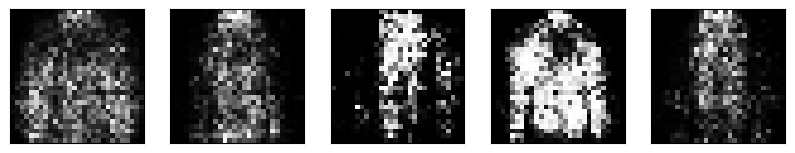

Época 077 finalizada: Loss Discriminador 1.194951 - Loss Gerador 1.458174


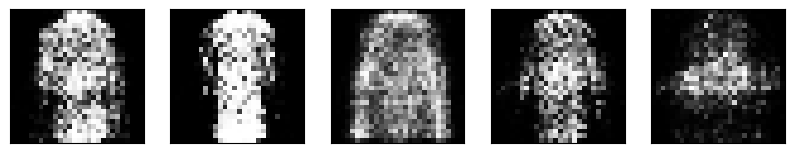

Época 078 finalizada: Loss Discriminador 1.199404 - Loss Gerador 1.459978


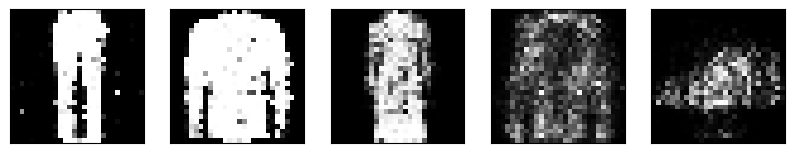

Época 079 finalizada: Loss Discriminador 1.202034 - Loss Gerador 1.504298


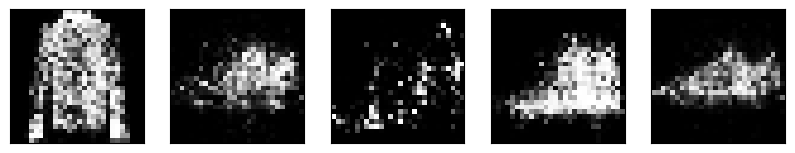

Época 080 finalizada: Loss Discriminador 1.209130 - Loss Gerador 1.420457


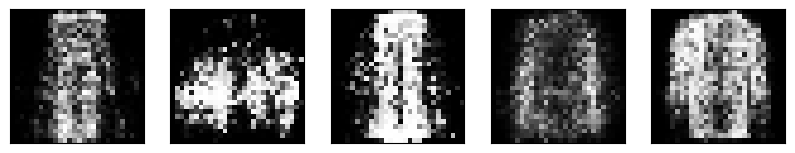

Época 081 finalizada: Loss Discriminador 1.202180 - Loss Gerador 1.487408


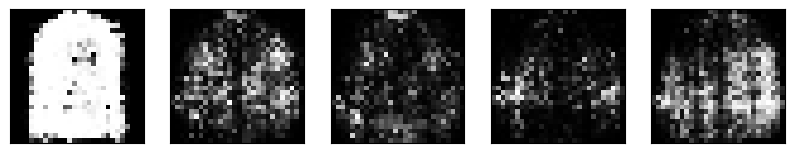

Época 082 finalizada: Loss Discriminador 1.180714 - Loss Gerador 1.489474


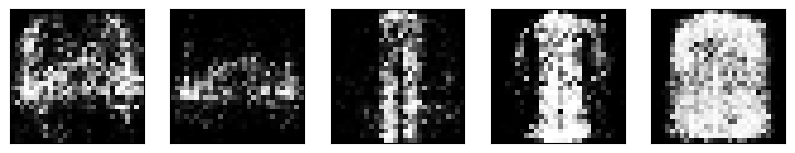

Época 083 finalizada: Loss Discriminador 1.206782 - Loss Gerador 1.335693


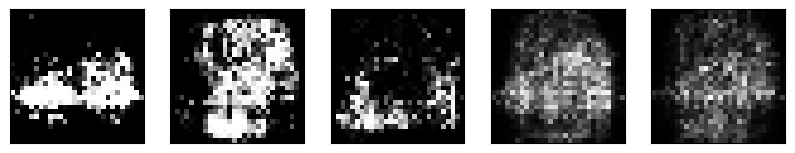

Época 084 finalizada: Loss Discriminador 1.210235 - Loss Gerador 1.343363


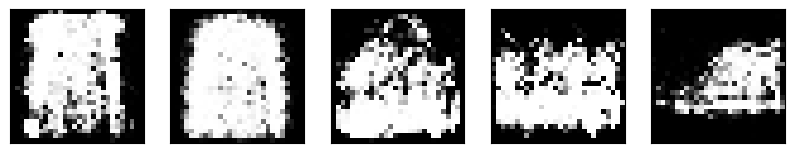

Época 085 finalizada: Loss Discriminador 1.193420 - Loss Gerador 1.397428


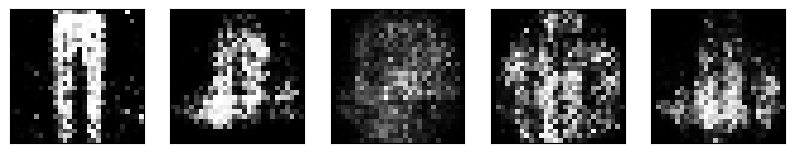

Época 086 finalizada: Loss Discriminador 1.228000 - Loss Gerador 1.350367


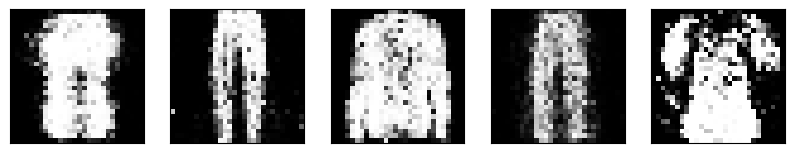

Época 087 finalizada: Loss Discriminador 1.209443 - Loss Gerador 1.304581


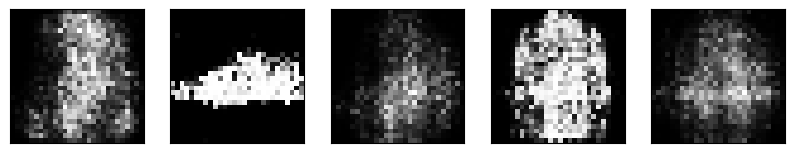

Época 088 finalizada: Loss Discriminador 1.218333 - Loss Gerador 1.330324


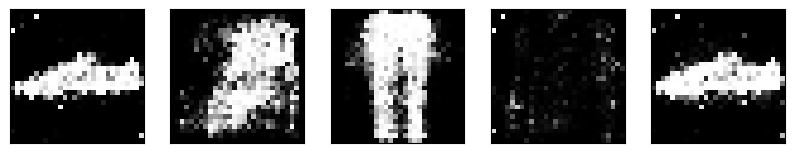

Época 089 finalizada: Loss Discriminador 1.225666 - Loss Gerador 1.264617


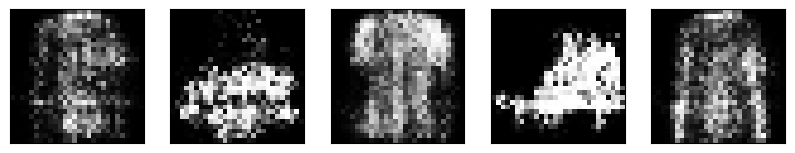

Época 090 finalizada: Loss Discriminador 1.226673 - Loss Gerador 1.325295


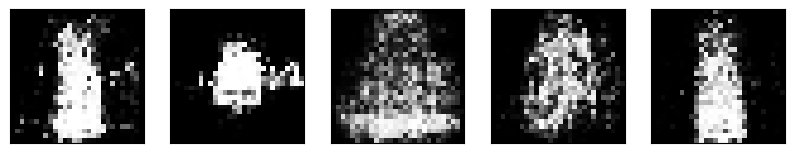

Época 091 finalizada: Loss Discriminador 1.225316 - Loss Gerador 1.324397


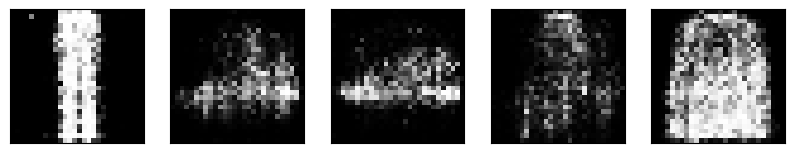

Época 092 finalizada: Loss Discriminador 1.247837 - Loss Gerador 1.281087


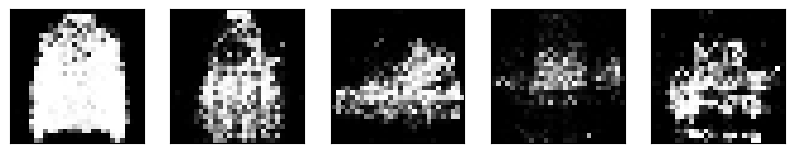

Época 093 finalizada: Loss Discriminador 1.223915 - Loss Gerador 1.253646


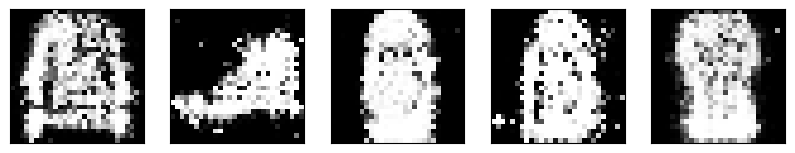

Época 094 finalizada: Loss Discriminador 1.236193 - Loss Gerador 1.276356


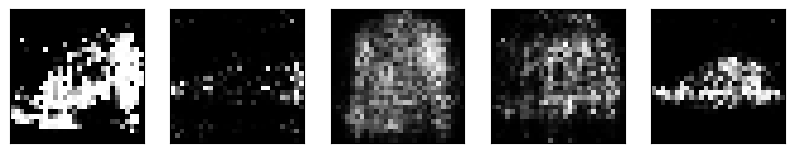

Época 095 finalizada: Loss Discriminador 1.264306 - Loss Gerador 1.281588


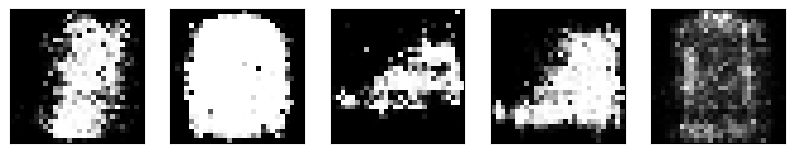

Época 096 finalizada: Loss Discriminador 1.250746 - Loss Gerador 1.284809


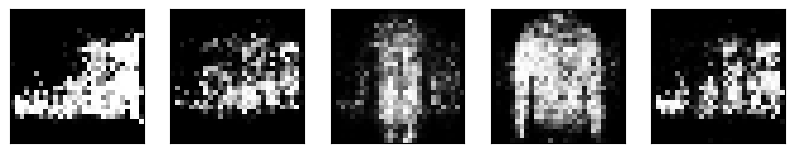

Época 097 finalizada: Loss Discriminador 1.241414 - Loss Gerador 1.271057


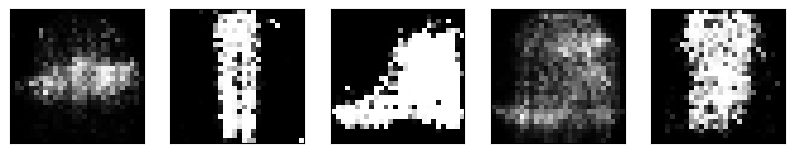

Época 098 finalizada: Loss Discriminador 1.226913 - Loss Gerador 1.291617


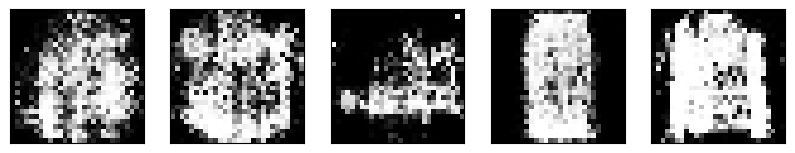

Época 099 finalizada: Loss Discriminador 1.238503 - Loss Gerador 1.209645


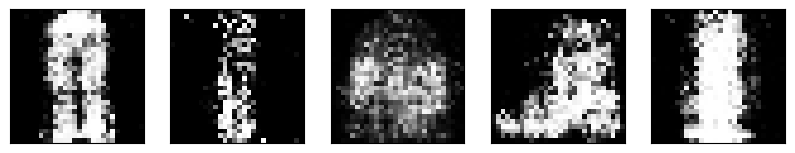

Época 100 finalizada: Loss Discriminador 1.239515 - Loss Gerador 1.259677


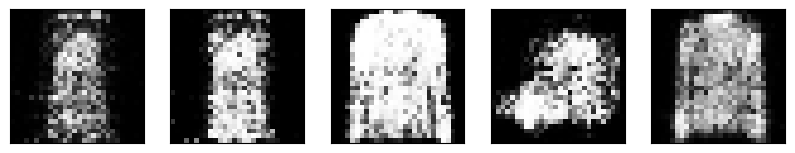

In [10]:
for epoch in range(100):
  D_running_loss = 0.
  G_running_loss = 0.

  for i, (imagens_reais, _) in enumerate(train_loader):
    batch_size = imagens_reais.size(0)

    imagens_reais = imagens_reais*2 - 1 # para lidar com a negatividade da tanh
    imagens_reais = imagens_reais.to(device)

    # Treinamento do gerador
    G_optimizer.zero_grad()

    ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)

    imagens_falsas = G(ruido)
    outputs_falsas = D(imagens_falsas)
    labels_falsas = torch.ones(batch_size).to(device)

    G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
    G_loss.backward()
    G_optimizer.step()

    G_running_loss += G_loss.item()

    # Treinamento do discriminador
    D_optimizer.zero_grad()

    outputs_reais = D(imagens_reais)
    labels_reais = (torch.ones(batch_size)).to(device) * 0.9 # suavização
    D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

    ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    imagens_falsas = G(ruido)
    outputs_falsas = D(imagens_falsas)
    labels_falsas = torch.zeros(batch_size).to(device)
    D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    D_loss = D_loss_reais + D_loss_falsas
    D_loss.backward()
    D_optimizer.step()

    D_running_loss += D_loss.item()

  D_running_loss /= len(train_loader)
  G_running_loss /= len(train_loader)

  print(f'Época {epoch+1:03d} finalizada: Loss Discriminador {D_running_loss:03.6f} - Loss Gerador {G_running_loss:03.6f}')

  fig,ax = plt.subplots(1, 5, figsize=(10, 5))
  for i in range(5):
    ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()

# Etapa 7: Criação de novas imagens

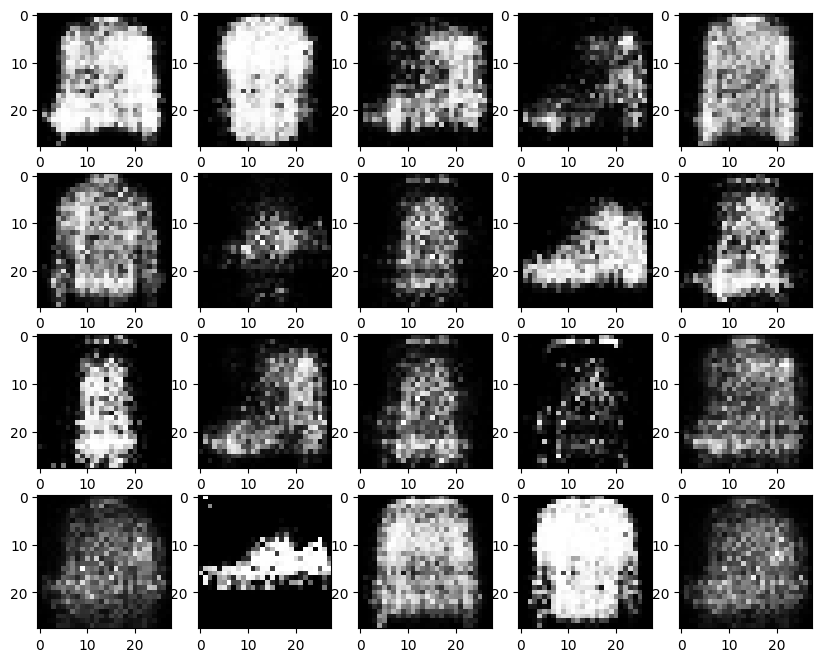

In [11]:
ruido = np.random.uniform(-1.,1.,(20, 100)) # 20 imagens (rede gera com 100 ruidos)
ruido = torch.from_numpy(ruido).float().to(device)

G.eval()
imagens_geradas = G(ruido)

fig,ax = plt.subplots(4, 5, figsize=(10, 8))
for i in range(imagens_geradas.shape[0]):
  ax[i//5, i%5].imshow(imagens_geradas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
